1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

From inspection there are 2 global minima
First global z minima location

x -0.09633044088057709

y 0.763157894736842

z -1


Second global z minima location

x 0.08283232543509327

y -0.6578947368421053

z -1


I havent implimented a way to do a y guess. I cycle through every y manualy. The initial X guess is already 0 and it works fine.


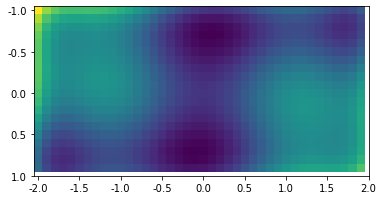

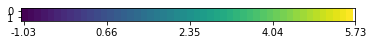

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

x = np.arange(-2,2,0.1)
y = np.arange(-1,1,0.1)

xm, ym = np.meshgrid(x,y)

def f(x,y):
    #x = xy[0]
    #y = xy[1]
    a = (4 - 2.1*(x**2) + (x**4)/3)*(x**2);
    b = x*y;
    c = (4*(y**2) - 4)*(y**2);
    
    return a + b + c;

z = list(map(f, xm, ym))

xtickLoc = np.linspace(0,40,9)
xtickLbl = np.linspace(-2,2,9)
#xtickLbl = map(m.floor ,xtickLbl)

ytickLoc = np.linspace(0,20,5)
ytickLbl = np.linspace(-1,1,5)

camel = plt.figure()
plt.imshow(z)
plt.xticks(xtickLoc, xtickLbl)
plt.yticks(ytickLoc, ytickLbl)

legend = plt.figure()
xticLoc = np.linspace(0,50,5)
xticLbl = np.linspace(np.min(z),np.max(z),5)
xticLbl = map(lambda x:round(x,2), xticLbl)
leg = np.linspace(np.min(z),np.max(z),50)
leg = np.stack((leg,leg))
plt.imshow(leg)
plt.xticks(xticLoc, xticLbl)

#finding the x,y and z of the minimum z.
def mini(f, numOfMin, Ybound):
    no = int(numOfMin)
    #no is the number of global minimums to find
    Xofzmin = np.zeros(no)
    Yofzmin = np.zeros(no)
    Zmin = np.full(no,10000000)
    for i in range(no):
        y = np.linspace(Ybound[i][0],Ybound[i][1],20)#the y range to look for global minimum
        for yi in y:
            #how do I know these arguments take the y slot in the function and not the x slot? 
            sol = opt.minimize(f ,args = (yi), x0 = [0])
            if sol.fun < Zmin[i]:
                Xofzmin[i] = sol.x
                Yofzmin[i] = yi
                Zmin[i] = sol.fun
    return Xofzmin, Yofzmin, Zmin

x, y, z = mini(f,numOfMin = 2,Ybound = [(0.5,1),(-1,-0.5)])

print('From inspection there are 2 global minima')

print('First global z minima location')
print('\nx',x[0])
print('\ny',y[0])
print('\nz',z[0])

print('\n\nSecond global z minima location')
print('\nx',x[1])
print('\ny',y[1])
print('\nz',z[1])


print('\n\nI havent implimented a way to do a y guess. I cycle through every y manualy. The initial X guess is already 0 and it works fine.')


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

The fit looks reasonable. I can't perform a chi2 test because there is no given error for the measurement. I will however check the correlation coefficient


The correlation coefficient for the max temp prediction is: 0.9287774853378252
As this value is close to 1. The fit is a good fit. But this does not mean there is not a better fit.


The correlation coefficient for the min temp prediction is: 0.9943935983181169
As this value is close to 1. The fit is a good fit. But this does not mean there is not a better fit.




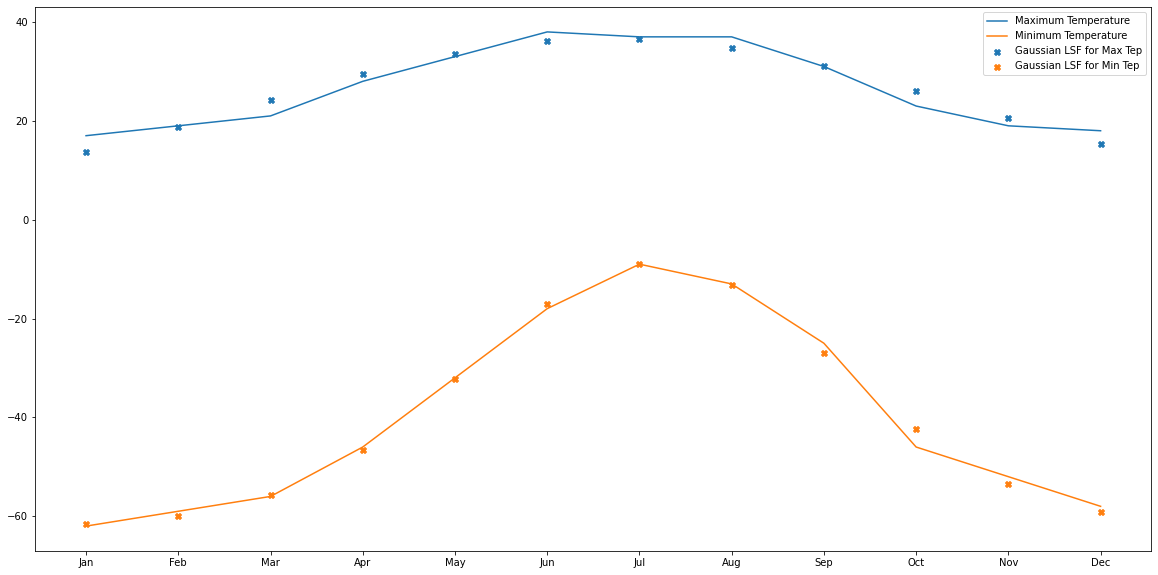

In [2]:
import matplotlib.pyplot as plt
import math

maxtemp = np.array([17,19,21,28,33,38,37,37,31,23,19,18])
mintemp = np.array([-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52,-58])

temperatures = plt.figure(figsize = (20,10))
ticloc = np.arange(0,12,1)
ticlbl = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.plot(maxtemp, label = 'Maximum Temperature')
plt.plot(mintemp, label = 'Minimum Temperature')
plt.xticks(ticloc,ticlbl)


def gauss(x,h,m,std):
    top = (x-m)**2
    
    bot = 2*std**2
    
    ind = -top/bot
    
    exp = list(map(math.exp, ind))
    ans = list(map(lambda i: h*i,exp))
    return ans

#max fit
param, var = opt.curve_fit(gauss, ticloc, maxtemp)
hifit = gauss(ticloc, param[0], param[1], param[2])
plt.scatter(ticloc, hifit, label = 'Gaussian LSF for Max Tep', marker = 'X')

#min fit
#make +ve
up = abs(np.min(mintemp))
mintemp = mintemp + up
param, var = opt.curve_fit(gauss, ticloc, mintemp, p0 = (60,6,3))
lofit = gauss(ticloc, param[0], param[1], param[2])
lofit = lofit - up
plt.scatter(ticloc, lofit, label = 'Gaussian LSF for Min Tep', marker = 'X')

plt.legend()

print("The fit looks reasonable. I can't perform a chi2 test because there is no given error for the measurement. I will however check the correlation coefficient\n\n")

#high temp
rss = sum((maxtemp-hifit)**2)
tss = sum((np.mean(maxtemp)-maxtemp)**2)
R = 1 - rss/tss
print('The correlation coefficient for the max temp prediction is:',R)
print('As this value is close to 1. The fit is a good fit. But this does not mean there is not a better fit.\n\n')


#low temp
mintemp = mintemp - up
rss = sum((mintemp-lofit)**2)
tss = sum((np.mean(mintemp)-mintemp)**2)
R = 1 - rss/tss
print('The correlation coefficient for the min temp prediction is:',R)
print('As this value is close to 1. The fit is a good fit. But this does not mean there is not a better fit.\n\n')

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

[1.0000e+00 1.0000e+00 1.0000e+00 2.0000e+00 3.0000e+00 6.0000e+00
 9.0000e+00 2.0000e+01 1.9400e+02 1.0894e+04] <class 'numpy.ndarray'> (10,)
[ 1.26528195 36.79430134  4.9040855 ]


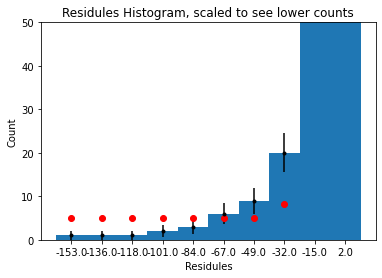

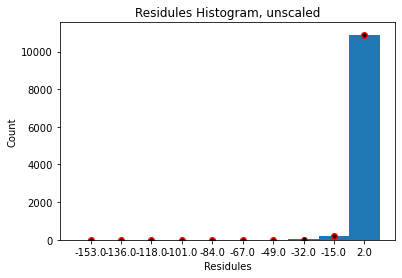

The chisq is:  60.12324537802569
The p-value is:  1.2693239792582744e-09
The p-value is very small. This suggests the fit is unsatisfactory. I believe the data does follow an expontential trend but the correct paramaters were not able to be discerned


In [3]:
import matplotlib.pyplot as plt
from scipy import stats
path = 'data/residuals_261.pkl'
data = np.load(path, allow_pickle=True).item()


def ex(x,a,b,c):
    exponent = x+b
    return (a**exponent) + c



hist = plt.hist(data['residuals'], bins = 10, zorder = 0)
plt.ylim(top = 50)
y = hist[0]
print(y, type(y), np.shape(y))
binEdge = hist[1]
bincenters = 0.5 * (binEdge[1:]+binEdge[:-1])

param, var = opt.curve_fit(ex, bincenters, y, p0 = (2,60,0))
h = list(map(lambda x: ex(x,param[0],param[1],param[2]), bincenters))
print(param)

binwidth = binEdge[1]-binEdge[0]
error = (y)**(1/2)
plt.title('Residules Histogram, scaled to see lower counts')
plt.ylabel('Count')
plt.xlabel('Residules')
plt.xticks(ticks = bincenters, labels = np.floor(bincenters))
plt.errorbar(bincenters,y, yerr = error, color = 'r',fmt='.k')
plt.scatter(bincenters,h, color = 'r', zorder = 2)
plt.show()

hist = plt.hist(data['residuals'], bins = 10)
#plt.ylim(top = 50)
y = hist[0]
binEdge = hist[1]
bincenters = 0.5 * (binEdge[1:]+binEdge[:-1])
binwidth = binEdge[1]-binEdge[0]
error = (y)**(1/2)
plt.title('Residules Histogram, unscaled')
plt.ylabel('Count')
plt.xlabel('Residules')
plt.xticks(ticks = bincenters, labels = np.floor(bincenters))
plt.errorbar(bincenters,y, yerr = error, color = 'r',fmt='.k')
plt.scatter(bincenters,h, color = 'r', zorder = 2)
plt.show()

#goodness of fit test
chisq = np.sum(((h - y)**2)/(error**2))
pvalue = 1. - stats.chi2.cdf(chisq, len(bincenters)-1)
print("The chisq is: ",chisq)
print("The p-value is: ",pvalue)

print("The p-value is very small. This suggests the fit is unsatisfactory. I believe the data does follow an expontential trend but the correct paramaters were not able to be discerned")


In [4]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2022-01-05 15:02:00--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2022-01-05 15:02:01--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc99819a41c8c4caa80eb666ac53.dl.dropboxusercontent.com/cd/0/inline/BdP0lmUv5yoSSBnfCpLmfT3ZVwhOFARvafCNk4kM_ESgNDqT3FjAUWk2khIu6k8sBXP-RjJcMX3CKBL3wgFY8HB81bIHC_YrlR7YfIEQhSKNEWXNcH_0kriYKCBLwFOxl909tKfiOyFYQH-V0WxcmkTm/file# [following]
--2022-01-05 15:02:01--  https://uc99819a41c8c4caa80eb666ac53.dl.dropboxusercontent.com/cd/0/inline/BdP0lmUv5yoSSBnfCpLmfT3ZVwhOFARvafCNk4kM_ESgNDqT3FjAUWk2khIu6k8sBXP-RjJc

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

[-9.98813369 12.33302301  9.38411486]
The best fit values of the parameters are: 
a: -9.988133687099397 
b: 12.333023014093643 
c: 9.384114862378437
The overall average temperature in munich is: 8.94310462216234
The typical daily average values for the hottest time of the year is 19.37219556069187
The typical daily average values for the coldest time of the year is -0.6037388908022958

b is the phase of the cosine, it will move the general shape of the fit to the left if decreases or right if increased. It will control what months have the highest temp


Now for g(x)
RSS for f(t): 34359.858599966494
RSS for g(x): 34352.794053852704

The function g(x) is better by 7.064546113790129 square residules.
CL: 0.584 , additional parameter necessary: NO


0.5840708167279869

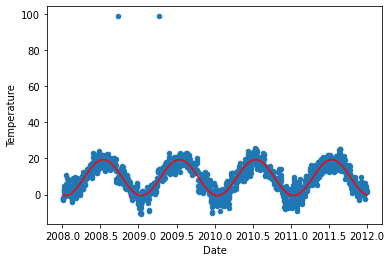

<Figure size 432x288 with 0 Axes>

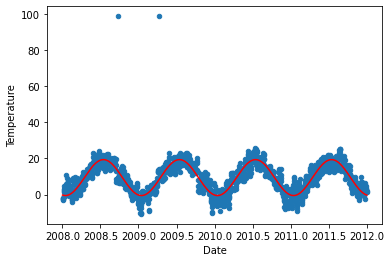

In [5]:
import scipy.optimize as opt
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
def f(t,a,b,c):
    cos = np.array(list(map(lambda co: math.cos(co), (math.pi*2*t+b))))
    ans = (a*cos)+c
    return ans

df = pd.read_csv('munich_temperatures_average_with_bad_data.txt', sep = ' ')
df.columns = ['Date', 'Temperature']
dfr = df[df['Date']<2012]
dfr = dfr[dfr['Date']>2008]

date = df['Date'].to_numpy()
params, _ = opt.curve_fit(f, dfr['Date'].to_numpy(),dfr['Temperature'].to_numpy())

dfr.plot.scatter('Date','Temperature')

tfit = f(dfr['Date'].to_numpy(), params[0],params[1],params[2])
#cos = np.array(list(map(lambda co: math.cos(co),(df['Date'].to_numpy()*params[1]*2*math.pi+params[2]))))
#tfit = params[0]*cos+ params[3]
#tfit = list(map(lambda t: f(t,params[0],params[1],params[2],params[3]),df['Date'].to_numpy()))
plt.plot(dfr['Date'],tfit, color = 'r')
print(params)
print('The best fit values of the parameters are:','\na:', params[0],'\nb:', params[1],'\nc:', params[2])

print("The overall average temperature in munich is:",df.mean(axis = 0)[1])

print("The typical daily average values for the hottest time of the year is", max(tfit))
print("The typical daily average values for the coldest time of the year is", min(tfit))
print("\nb is the phase of the cosine, it will move the general shape of the fit to the left if decreases or right if increased. It will control what months have the highest temp")

print("\n\nNow for g(x)")

def g(t,a,b,c,d):
    cos = np.array(list(map(lambda co: math.cos(co), (math.pi*2*t*b+c))))
    ans = (a*cos)+d
    return ans

params, _ = opt.curve_fit(g, dfr['Date'].to_numpy(),dfr['Temperature'].to_numpy())
gfig = plt.figure()
dfr.plot.scatter('Date','Temperature')
xfit = g(dfr['Date'].to_numpy(), params[0],params[1],params[2], params[3])
plt.plot(dfr['Date'],xfit, color = 'r')

rssf = sum((dfr['Temperature']-tfit)**2)
rssg = sum((dfr['Temperature']-xfit)**2)

print("RSS for f(t):",rssf)
print("RSS for g(x):",rssg)

print("\nThe function g(x) is better by",rssf-rssg,"square residules.")

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

Ftest(rssf,rssg, 2,3,dfr['Date'].size, True)

In [6]:
!wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P data/

--2022-01-05 15:02:07--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2022-01-05 15:02:08--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5ebffab1a3438e3e9e9fe67eec.dl.dropboxusercontent.com/cd/0/inline/BdNRUYBLXUYGjueg_9dHgn3SPTE4R6Ah3dYK1y2LDIYTEld42-kHdnrcTaSUJwHDUgU1z3WQ7o0gWpfKxBucnp0_yhlImF_Zq8hi3BhwYJv2hghsRsTqFHH-oVx84Dx2R6By84GMQssubXNROd_LTKuB/file# [following]
--2022-01-05 15:02:08--  https://uc5ebffab1a3438e3e9e9fe67eec.dl.dropboxusercontent.com/